## Erste Analysen des Datensets
Erste Visualisierungen von Abhängigkeiten bzw. Korrelationen verschiedener Parameter.

### Datenset laden & Head zeigen
Lädt Daten und zeigt Auszug der ersten paar Reihen.


In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
import src.package.importer as im
import src.package.consts as c
import src.package.charts as charts
import pandas as pd

# set size of seaborn plots
charts.set_preferences(sns)
pd.set_option('display.max_rows', 50)

df = im.get_extended_dataset('../package/datasets/full_dataset.csv')
df_full = im.get_dataset('../package/datasets/full_dataset.csv')
print(df_full.info(verbose=True))
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 920 entries, 5 to 3726
Data columns (total 231 columns):
 #    Column                                   Dtype  
---   ------                                   -----  
 0    id                                       int64  
 1    source                                   object 
 2    verification_status                      object 
 3    title                                    object 
 4    neubau_umbau                             object 
 5    comment                                  object 
 6    nom_address                              object 
 7    nom_zip                                  float64
 8    nom_location_name                        object 
 9    nom_country                              object 
 10   nom_economy_region                       object 
 11   index_year                               float64
 12   index_month                              float64
 13   index_source                             object 
 14   plannin

,id,source,verification_status,title,neubau_umbau,comment,nom_address,nom_zip,nom_location_name,nom_country,...,rebuild_sanitary_and_kitchen_type,rebuild_building_shell_types,total_expenses,cost_ref_gf,cost_ref_gfs,cost_ref_faw,cost_ref_fb,cost_ref_buf,cost_ref_vau,ratio_hnf_gf
5,1637,wbw_050_1986_4,VERIFIED_OK,"Loogarten, Zürich_BKP1",NEUBAU,Index und Anlagekosten i.O. BKP 2stellig nich...,Salzweg 1,8048.0,Zürich,SWITZERLAND,...,NaN,NaN,9265295.0,5793.0,13758.0,NaN,NaN,NaN,NaN,NaN
6,995,wbw_009_1983_6,VERIFIED_OK,Wohnsiedlung am Aabach in Mönchaltorf,NEUBAU,Alle Werte x 15 (Anzahl Häuser) genommen Nutz...,Seestrasse 20 - 48,8617.0,Mönchaltorf,SWITZERLAND,...,NaN,NaN,4069500.0,5067.0,9108.0,NaN,NaN,NaN,NaN,NaN
8,1787,wbw_002_1982_12,VERIFIED_OK,Reuss-Siedlung in Unterwindisch,NEUBAU,"Nutzung 2 überprüfen, die offene Einstellhall...","Ländestrasse 13, 15",5210.0,Unterwindisch,SWITZERLAND,...,NaN,NaN,1875000.0,2198.0,3290.0,NaN,NaN,NaN,NaN,NaN
9,2468,"wbw_020_1984_1,2",VERIFIED_OK,Regionalspital Sitten,NEUBAU,Kennwerte bereinigt BKP5 geschätzt!,Avenue du Grand Champsec 80,1951.0,Sitten,SWITZERLAND,...,NaN,NaN,83902401.0,21600.0,155000.0,NaN,NaN,NaN,NaN,NaN
11,1775,wbw_004_1982_12,VERIFIED_OK,Genossenschaftliche Wohnbauten in Zürich,NEUBAU,NaN,Gutstrasse 206 - 228,8003.0,Zürich,SWITZERLAND,...,NaN,NaN,16984000.0,16360.0,7057.0,NaN,NaN,NaN,NaN,NaN


### Quellen
Zeigt Quellen in aufsteigender Rheinfolge (Anzahl Einträge pro Quelle) an.

In [10]:
counts = df_full["source"].value_counts()
counts.head(50)

b+p baurealisation ag                   30
OAK Bildungsbauten crb D/2017           19
OAK Wohnbauten im Vergleich crb D/11    11
b&p_Kostenklarheit_2011                  9
Lead User BGV                            6
mba_architekten                          4
fiktives Objekt mba                      4
BBL_BE_2013                              4
Lead_User_Walker                         4
Hochbau Stadt Bern_2016                  3
HBA Kanton Solothurn_2014                3
Hochbau Stadt Bern_2014                  2
wbw_052_1986_6                           2
Lead_User_BGV                            2
BBL_BE_2015                              2
Lead User Metron                         2
Hochbau Stadt Bern_2010                  2
AfS Stadt Winterthur_2009                2
hs architektur ag                        2
lead_Test Organisation walker_6523       2
wbw_520_2008_9                           2
AHB Stadt Zuerich_01_2014                2
wbw_202_1993_7,8                         2
mba_immobil

### Prüfung der Daten
Zeigt Informationen zum Datenset an.<br>
z.B. Anzahl fehlender Daten. (Gefiltert auf Relevanz)


In [11]:
filtered_df = im.select_relevant_features(df)
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 919 entries, 5 to 3726
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   nom_usage_main          888 non-null    object 
 1   usage_cluster           888 non-null    object 
 2   nom_facade              810 non-null    object 
 3   area_total_floor_416    911 non-null    float64
 4   area_net_floor_416      306 non-null    float64
 5   area_main_usage         425 non-null    float64
 6   volume_total_416        640 non-null    float64
 7   volume_total_116        468 non-null    float64
 8   num_buildings           919 non-null    int64  
 9   num_floors_overground   864 non-null    float64
 10  num_floors_underground  919 non-null    float64
 11  total_expenses          859 non-null    float64
 12  cost_ref_gf             832 non-null    float64
 13  cost_ref_gfs            724 non-null    float64
 14  ratio_hnf_gf            424 non-null    f

In [12]:
df[c.FIELD_USAGE_CLUSTER].value_counts()

WOHNEN           286
SCHULEN          190
HALLEN            99
BUERO             96
BETRIEB           65
BEHERBERGUNG      62
GESUNDHEIT        30
KULTUS_KULTUR     27
ANDERES           15
TECHNIK            9
OFFENE_BAUTEN      9
Name: usage_cluster, dtype: int64

In [13]:
filtered_df.describe()

,area_total_floor_416,area_net_floor_416,area_main_usage,volume_total_416,volume_total_116,num_buildings,num_floors_overground,num_floors_underground,total_expenses,cost_ref_gf,cost_ref_gfs,ratio_hnf_gf
count,911.000000,306.000000,425.000000,640.000000,468.000000,919.000000,864.000000,919.000000,8.590000e+02,832.000000,7.240000e+02,424.000000
mean,6377.151482,4768.549020,3242.647059,23226.376563,28742.329060,1.645267,3.364178,0.907182,1.773971e+07,6333.429087,1.186630e+04,0.565142
std,8611.920057,6409.644427,4287.510920,32233.403837,38964.789441,1.902400,1.976066,0.710681,2.586537e+07,8400.375894,5.480701e+04,0.126705
min,13.000000,98.000000,75.000000,167.000000,356.000000,1.000000,0.000000,0.000000,3.289180e+05,13.000000,1.000000e+00,0.088281
25%,1426.500000,1101.500000,710.000000,4490.500000,6625.000000,1.000000,2.000000,0.500000,4.397345e+06,1492.750000,2.184250e+03,0.491174
50%,3407.000000,2173.000000,1583.000000,12061.000000,16826.500000,1.000000,3.000000,1.000000,9.997500e+06,3466.500000,5.358000e+03,0.551310
75%,7624.500000,5836.750000,4029.000000,28739.000000,33038.500000,1.000000,4.000000,1.000000,1.951250e+07,7630.250000,1.029775e+04,0.628242
max,75328.000000,50240.000000,29437.000000,272000.000000,315370.000000,28.000000,15.600000,5.000000,3.400000e+08,75328.000000,1.070000e+06,0.979381


<br>

---

<br>

## Korrelationen

### Correlation Heatmap
Zeigt Korrelationen zwischen unterschiedlichen Werten auf. (Big Picture)

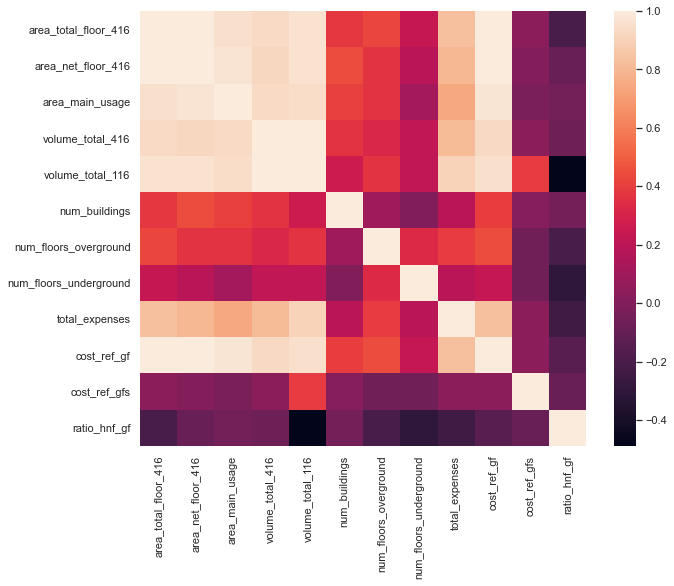

In [14]:
sns.heatmap(filtered_df.corr());

<br>

---

<br>

### Geschossfläche GF
Zeigt **Hauptnutzfläche** in relation zur **Geschossfläche**.
<br>Optional: Anzahl Stockwerke

<AxesSubplot:xlabel='Geschossfläche GF', ylabel='Hauptnutzfläche HNF'>

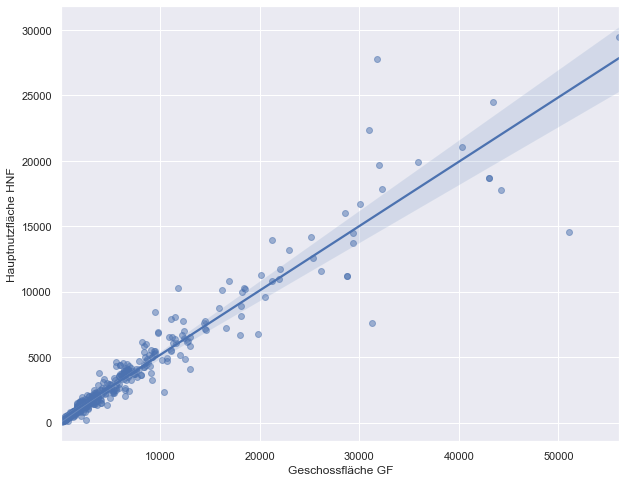

In [15]:
charts.regplot_gf_field(df)

<br>

---

<br>

### Geschossfläche GF
Zeigt **Hauptnutzfläche** in relation zur **Geschossfläche**.<br>
Zusätzliche Kategorisierung nach **Hauptnutzung**.<br>
<br>
Auffällige Ausreisser bei "Typ" Technik (deshalb entfernt von Grafik).

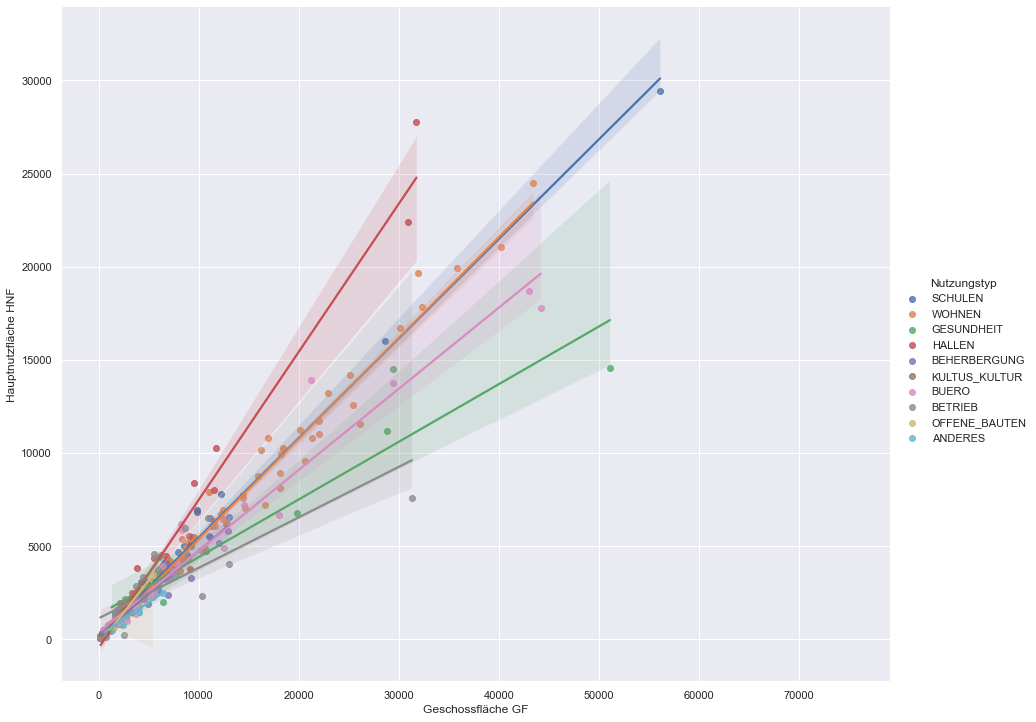

In [16]:
filtered_df = df[(df[c.FIELD_USAGE_CLUSTER] != 'IRRELEVANT') & (df[c.FIELD_USAGE_CLUSTER] != 'TECHNIK')]

gf = sns.lmplot(
    data=filtered_df,
    x=c.FIELD_AREA_TOTAL_FLOOR_416, y=c.FIELD_AREA_MAIN_USAGE,
    hue=c.FIELD_USAGE_CLUSTER,
    height=charts.CHART_HEIGHT, aspect=charts.CHART_HEIGHT/charts.CHART_WIDTH
)

gf.set(xlabel='Geschossfläche GF', ylabel='Hauptnutzfläche HNF')
gf.legend.set_title('Nutzungstyp')

### Geschossfläche und Stockwerke
Zeigt **Geschossfläche** in relation zur Anzahl **Stockwerke**.

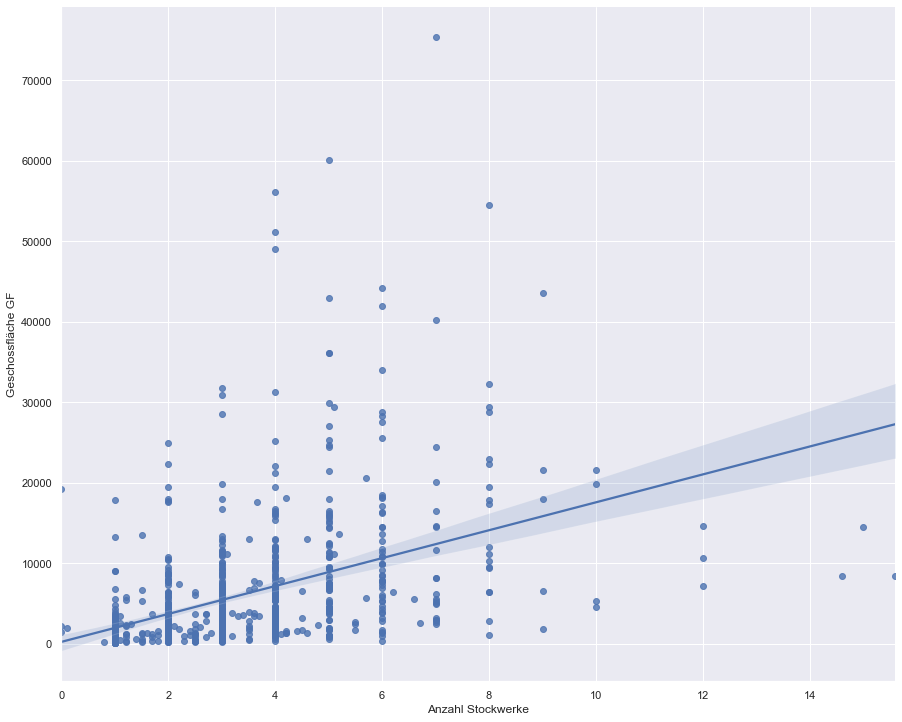

In [17]:
gf = sns.lmplot(
    data=df,
    x=c.FIELD_NUM_FLOORS_OVERGROUND, y=c.FIELD_AREA_TOTAL_FLOOR_416,
    height=charts.CHART_HEIGHT, aspect=charts.CHART_HEIGHT/charts.CHART_WIDTH
    # hue=im.FIELD_USAGE_CLUSTER
)

gf.set(xlabel='Anzahl Stockwerke', ylabel='Geschossfläche GF')

<br>

---

<br>

## Verteilungen
Zeigt Verteilungen unterschiedlicher Features.

### Hauptnutzfläche
Zeigt die Verteilung der Grösse **Hauptnutzflächen**<br>
Aufteilung nach Cluster möglich.
<br>

[Text(0.5, 0, 'Hauptnutzfläche HNF'), Text(0, 0.5, 'Vorkommen')]

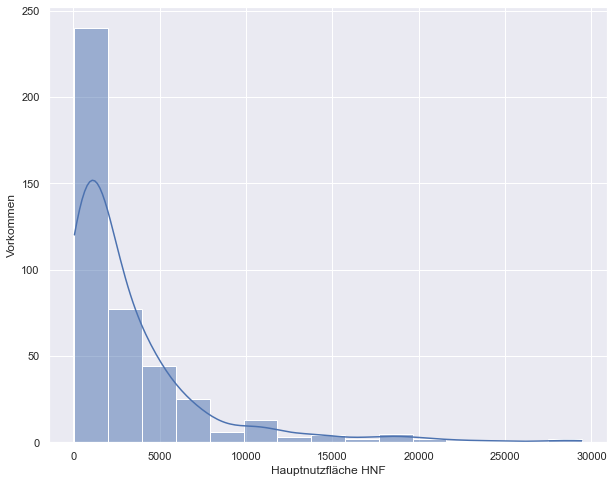

In [18]:
gf = sns.histplot(
    data=df,
    x=c.FIELD_AREA_MAIN_USAGE,
    # hue=im.FIELD_USAGE_CLUSTER,
    bins=15,
    kde='true'
)

gf.set(xlabel='Hauptnutzfläche HNF', ylabel='Vorkommen')

### Stockwerke
Zeigt die Verteilung unterschiedlicher Anzahl **Stockwerke**<br>
Aufteilung nach Cluster möglich.
<br>

[Text(0.5, 0, 'Anzahl Stockwerke'), Text(0, 0.5, 'Vorkommen')]

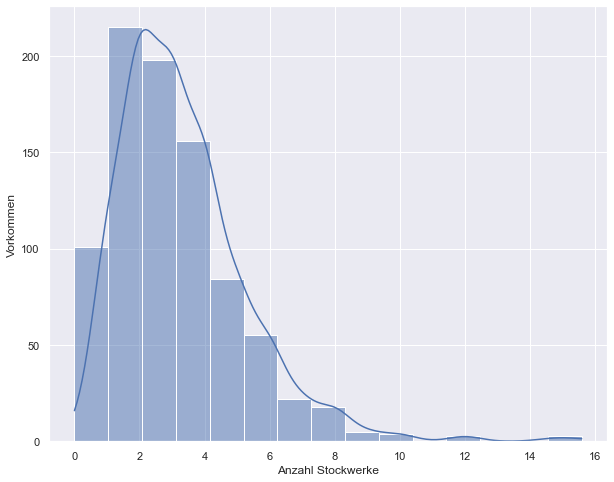

In [19]:
gf = sns.histplot(
    data=df,
    x=c.FIELD_NUM_FLOORS_OVERGROUND,
    # hue=im.FIELD_USAGE_CLUSTER,
    bins=15,
    kde='true'
)

gf.set(xlabel='Anzahl Stockwerke', ylabel='Vorkommen')

### Nutzungstypen
Zeigt die Verteilung unterschiedlicher **Nutzungstypen**<br>
Aufteilung nach Cluster möglich.
<br>

    usage_cluster  count
0         ANDERES   15.0
1    BEHERBERGUNG   62.0
2         BETRIEB   65.0
3           BUERO   96.0
4      GESUNDHEIT   30.0
5          HALLEN   99.0
6   KULTUS_KULTUR   27.0
7   OFFENE_BAUTEN    9.0
8         SCHULEN  190.0
9         TECHNIK    9.0
10         WOHNEN  286.0


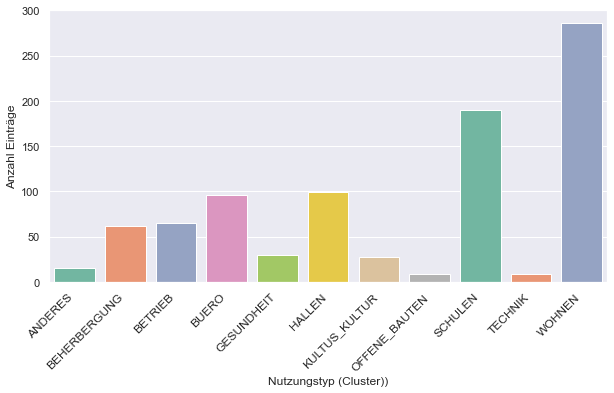

In [43]:
# preprocess data and set seaborn preferences
data = df.groupby(df_full[c.FIELD_USAGE_CLUSTER]).describe()["id"]["count"].reset_index()
sns.set(rc={'figure.figsize': (10, 5)}, font_scale=1)

print(data)

# plot data
gf = sns.barplot(
    data=data,
    x=c.FIELD_USAGE_CLUSTER,
    y="count",
    palette=sns.color_palette("Set2")
)

# set labels and design
gf.set(xlabel='Nutzungstyp (Cluster))', ylabel='Anzahl Einträge')
plt.xticks(
    rotation=45,
    horizontalalignment='right',
    fontweight='normal',
    fontsize='medium'
)

None

# save figure

### Lift
Zeigt Korrelation gruppiert nach Attribut **Lift vorhanden** auf.
<br>

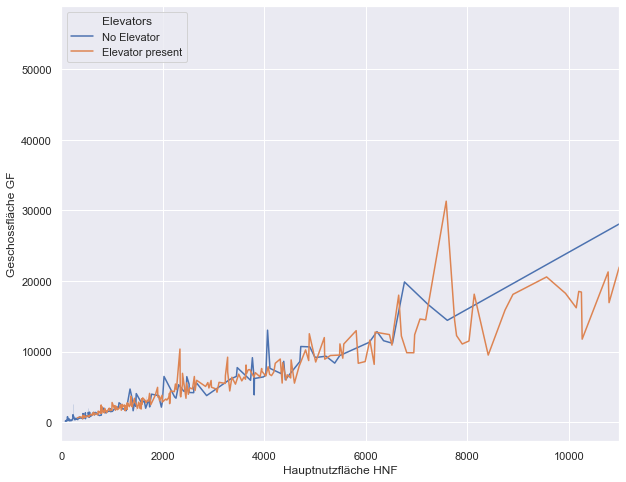

In [40]:
gf = sns.lineplot(
    data=df,
    x=c.FIELD_AREA_MAIN_USAGE,
    y=c.FIELD_AREA_TOTAL_FLOOR_416,
    # hue=im.FIELD_NUM_BUILDINGS
    hue=c.FIELD_ELEVATOR_PRESENT
)

gf.set_xlim(0, 11000)
gf.set(xlabel='Hauptnutzfläche HNF', ylabel='Geschossfläche GF')
plt.legend(title='Elevators', loc='upper left', labels=['No Elevator', 'Elevator present'])
